In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importante: O exemplo GIANTSTEPS3519546.LOFI não pode ser utilizado. Tempo mais curto que a janela.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import shutil
#shutil.copy2("/content/drive/MyDrive/utilities.py", "/content/utilities.py")
#shutil.copy2("/content/drive/MyDrive/ConvNet3DSpecShanMorl.py", "/content/ConvNet3DSpecShanMorl.py")
#shutil.copy2("/content/drive/MyDrive/config.py", "/content/config.py")

'/content/config.py'

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.data import AUTOTUNE
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import os
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import Audio, clear_output, display
from glob import glob
import random

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers, models


In [3]:
BS = 32 #batch size

base_model = EfficientNetB0(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 300, 300,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 300, 300,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        512 │ block1a_se_excit

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

# k=1

In [7]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento1.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [8]:
TRAIN_DATASET = os.path.join("/content", "training1")
VAL_DATASET = os.path.join("/content", "validation1")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [9]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [10]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [12]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [13]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [14]:
list_images_train = list(images_train.as_numpy_iterator())

In [15]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [16]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [17]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [18]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [19]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [20]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 558ms/step - accuracy: 0.1943 - loss: 2.2399 - val_accuracy: 0.1250 - val_loss: 2.2659
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4709 - loss: 1.7847 - val_accuracy: 0.2200 - val_loss: 2.1186
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6024 - loss: 1.4411 - val_accuracy: 0.3400 - val_loss: 1.9032
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6704 - loss: 1.1727 - val_accuracy: 0.4700 - val_loss: 1.6653
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7098 - loss: 0.9496 - val_accuracy: 0.5100 - val_loss: 1.4230
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7839 - loss: 0.7728 - val_accuracy: 0.5550 - val_loss: 1.2150
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7972 - loss: 0.6366 - val_accuracy: 0.6300 - val_loss: 1.0739
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8408 - loss: 0.5721 - val_acc

In [21]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9970 - loss: 0.0121 - val_accuracy: 0.8200 - val_loss: 0.7095
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9982 - loss: 0.0090 - val_accuracy: 0.8200 - val_loss: 0.6917
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9957 - loss: 0.0197 - val_accuracy: 0.8250 - val_loss: 0.6843
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.8250 - val_loss: 0.6583
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9969 - loss: 0.0122 - val_accuracy: 0.8250 - val_loss: 0.6429
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9985 - loss: 0.0117 - val_accuracy: 0.8250 - val_loss: 0.6325
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.8350 - val_loss: 0.6233
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9922 - loss: 0.0215 - val_accuracy: 0.

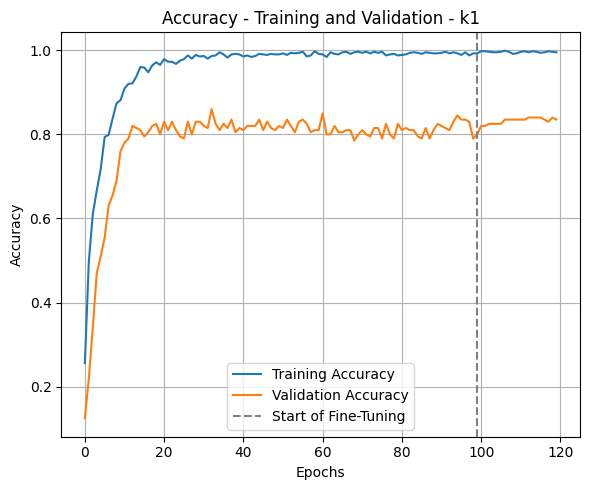

In [22]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/accuracy_genre_mel_k1.pdf')
plt.show()

In [23]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/acc_total_k1.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/val_acc_total_k1.npy', val_acc_total)

In [24]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k1.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


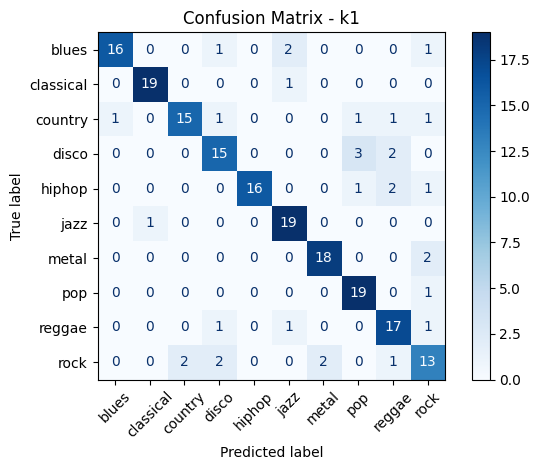

In [26]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k1")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/confusionmatrix_genre_mel_k1.pdf')
plt.show()

In [27]:
from google.colab import runtime
runtime.unassign()

# k=2

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento2.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training2")
VAL_DATASET = os.path.join("/content", "validation2")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [15]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [16]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [17]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 557ms/step - accuracy: 0.1480 - loss: 2.2647 - val_accuracy: 0.1600 - val_loss: 2.2452
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5018 - loss: 1.7904 - val_accuracy: 0.2650 - val_loss: 2.1182
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6459 - loss: 1.3767 - val_accuracy: 0.3900 - val_loss: 1.9298
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6740 - loss: 1.1028 - val_accuracy: 0.4600 - val_loss: 1.7229
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7296 - loss: 0.8767 - val_accuracy: 0.5200 - val_loss: 1.5220
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7586 - loss: 0.7643 - val_accuracy: 0.5800 - val_loss: 1.3194
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8117 - loss: 0.6290 - val_accuracy: 0.6000 - val_loss: 1.1729
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8557 - loss: 0.5514 - val_acc

In [18]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8150 - val_loss: 0.8527
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9892 - loss: 0.0204 - val_accuracy: 0.8150 - val_loss: 0.8054
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9956 - loss: 0.0227 - val_accuracy: 0.8250 - val_loss: 0.7814
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9836 - loss: 0.0429 - val_accuracy: 0.8350 - val_loss: 0.7443
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9990 - loss: 0.0097 - val_accuracy: 0.8400 - val_loss: 0.7336
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.8400 - val_loss: 0.7288
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9955 - loss: 0.0149 - val_accuracy: 0.8350 - val_loss: 0.7277
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9919 - loss: 0.0198 - val_accuracy: 0.

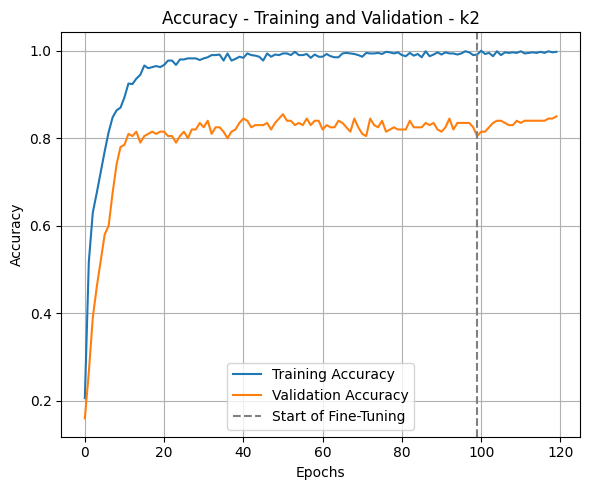

In [19]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/accuracy_genre_mel_k2.pdf')
plt.show()

In [20]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/acc_total_k2.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/val_acc_total_k2.npy', val_acc_total)

In [21]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k2.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


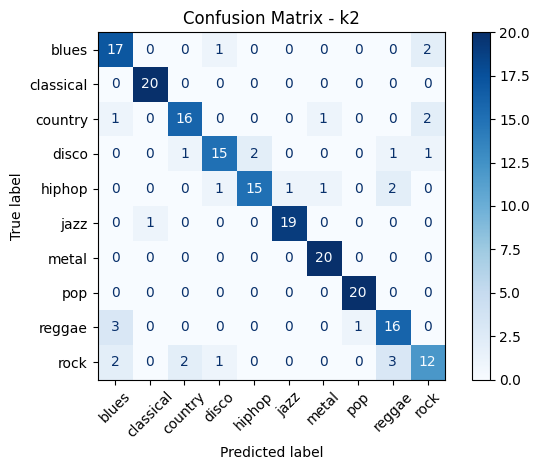

In [23]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k2")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/confusionmatrix_genre_mel_k2.pdf')
plt.show()

In [24]:
from google.colab import runtime
runtime.unassign()

# k=3

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento3.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training3")
VAL_DATASET = os.path.join("/content", "validation3")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [15]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [16]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [17]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 552ms/step - accuracy: 0.2038 - loss: 2.2100 - val_accuracy: 0.1700 - val_loss: 2.2427
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5044 - loss: 1.7320 - val_accuracy: 0.1800 - val_loss: 2.1648
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5977 - loss: 1.3246 - val_accuracy: 0.2850 - val_loss: 2.0553
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6942 - loss: 1.0740 - val_accuracy: 0.2800 - val_loss: 2.0116
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7410 - loss: 0.8846 - val_accuracy: 0.3300 - val_loss: 1.8327
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7491 - loss: 0.7934 - val_accuracy: 0.4350 - val_loss: 1.6011
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8249 - loss: 0.6235 - val_accuracy: 0.5000 - val_loss: 1.4980
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8624 - loss: 0.4892 - val_acc

In [18]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9943 - loss: 0.0141 - val_accuracy: 0.8000 - val_loss: 0.9323
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9975 - loss: 0.0111 - val_accuracy: 0.8000 - val_loss: 0.9303
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9954 - loss: 0.0245 - val_accuracy: 0.8000 - val_loss: 0.9284
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9987 - loss: 0.0092 - val_accuracy: 0.7950 - val_loss: 0.9274
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9994 - loss: 0.0065 - val_accuracy: 0.7950 - val_loss: 0.9281
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9975 - loss: 0.0105 - val_accuracy: 0.7950 - val_loss: 0.9262
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9988 - loss: 0.0121 - val_accuracy: 0.8050 - val_loss: 0.9274
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9872 - loss: 0.0279 - val_accuracy: 0.

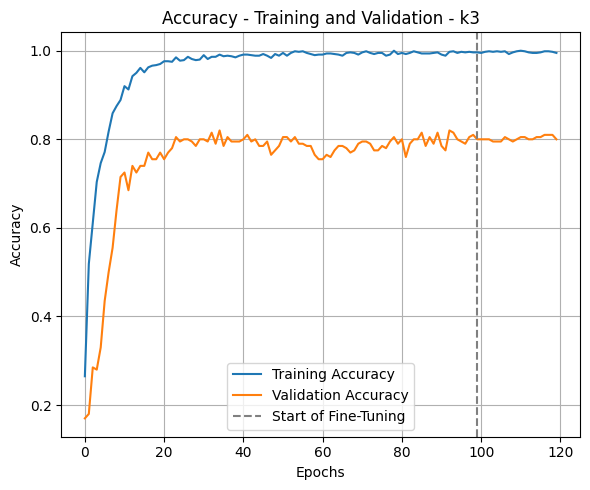

In [19]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/accuracy_genre_mel_k3.pdf')
plt.show()

In [20]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/acc_total_k3.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/val_acc_total_k3.npy', val_acc_total)

In [21]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k3.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


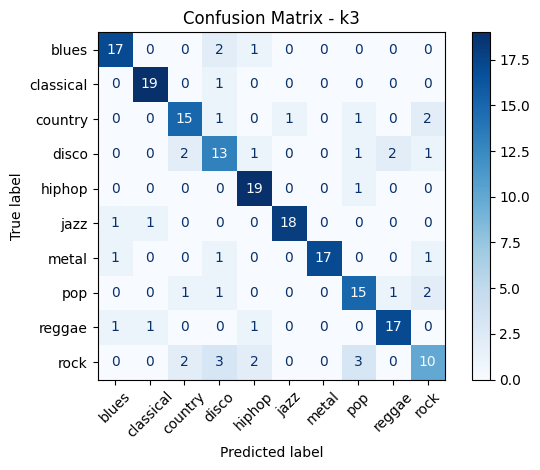

In [23]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k3")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/confusionmatrix_genre_mel_k3.pdf')
plt.show()

In [24]:
from google.colab import runtime
runtime.unassign()

# k=4

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento4.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training4")
VAL_DATASET = os.path.join("/content", "validation4")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [15]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [16]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [17]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 561ms/step - accuracy: 0.1544 - loss: 2.3063 - val_accuracy: 0.1200 - val_loss: 2.3302
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.4834 - loss: 1.7977 - val_accuracy: 0.1950 - val_loss: 2.1451
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5748 - loss: 1.4350 - val_accuracy: 0.3150 - val_loss: 1.9536
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6606 - loss: 1.1441 - val_accuracy: 0.4450 - val_loss: 1.7157
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7192 - loss: 0.9302 - val_accuracy: 0.4950 - val_loss: 1.4334
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7570 - loss: 0.7638 - val_accuracy: 0.5800 - val_loss: 1.2426
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7997 - loss: 0.6350 - val_accuracy: 0.6600 - val_loss: 1.0795
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8403 - loss: 0.5476 - val_acc

In [18]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9971 - loss: 0.0137 - val_accuracy: 0.8300 - val_loss: 1.0001
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9922 - loss: 0.0210 - val_accuracy: 0.8250 - val_loss: 1.0109
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9965 - loss: 0.0097 - val_accuracy: 0.8200 - val_loss: 1.0197
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9944 - loss: 0.0119 - val_accuracy: 0.8200 - val_loss: 1.0263
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.8150 - val_loss: 1.0324
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9987 - loss: 0.0084 - val_accuracy: 0.8150 - val_loss: 1.0349
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9951 - loss: 0.0090 - val_accuracy: 0.8100 - val_loss: 1.0428
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.

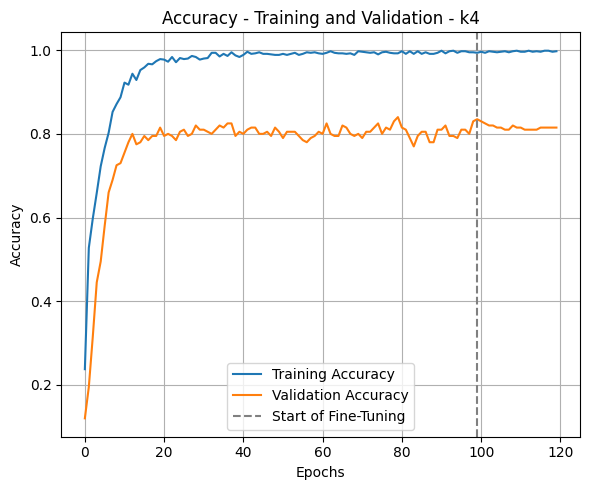

In [19]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/accuracy_genre_mel_k4.pdf')
plt.show()

In [20]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/acc_total_k4.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/val_acc_total_k4.npy', val_acc_total)

In [21]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k4.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k4.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


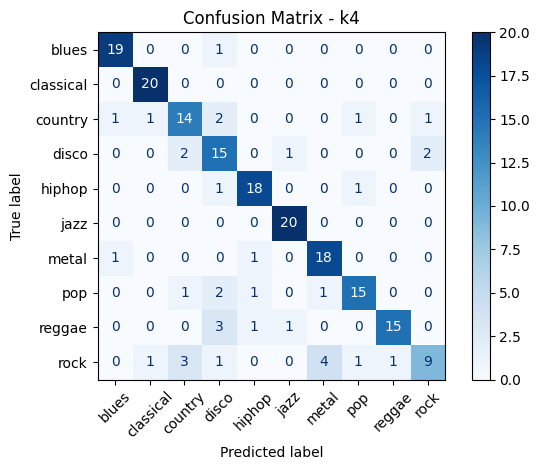

In [23]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k4")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/confusionmatrix_genre_mel_k4.pdf')
plt.show()

In [24]:
from google.colab import runtime
runtime.unassign()

# k=5

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento5.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training5")
VAL_DATASET = os.path.join("/content", "validation5")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 573ms/step - accuracy: 0.1707 - loss: 2.2261 - val_accuracy: 0.1850 - val_loss: 2.2232
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.5020 - loss: 1.7676 - val_accuracy: 0.2350 - val_loss: 2.0974
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6271 - loss: 1.3516 - val_accuracy: 0.3500 - val_loss: 1.9380
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6808 - loss: 1.1046 - val_accuracy: 0.3450 - val_loss: 1.7824
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7210 - loss: 0.9084 - val_accuracy: 0.4250 - val_loss: 1.6325
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7351 - loss: 0.7951 - val_accuracy: 0.4450 - val_loss: 1.5818
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8415 - loss: 0.6009 - val_accuracy: 0.5200 - val_loss: 1.4493
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8551 - loss: 0.5137 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9912 - loss: 0.0193 - val_accuracy: 0.7700 - val_loss: 1.1460
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9945 - loss: 0.0133 - val_accuracy: 0.7800 - val_loss: 1.1229
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9950 - loss: 0.0136 - val_accuracy: 0.7850 - val_loss: 1.1068
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9962 - loss: 0.0088 - val_accuracy: 0.7900 - val_loss: 1.1001
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9940 - loss: 0.0121 - val_accuracy: 0.7900 - val_loss: 1.0960
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9990 - loss: 0.0102 - val_accuracy: 0.7850 - val_loss: 1.0963
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9955 - loss: 0.0122 - val_accuracy: 0.7850 - val_loss: 1.0922
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9952 - loss: 0.0104 - val_accuracy: 0.

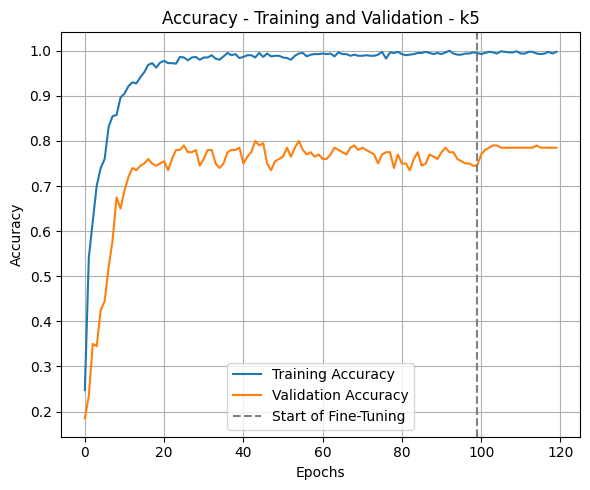

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/accuracy_genre_mel_k5.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/acc_total_k5.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/val_acc_total_k5.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k5.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/model_k5.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


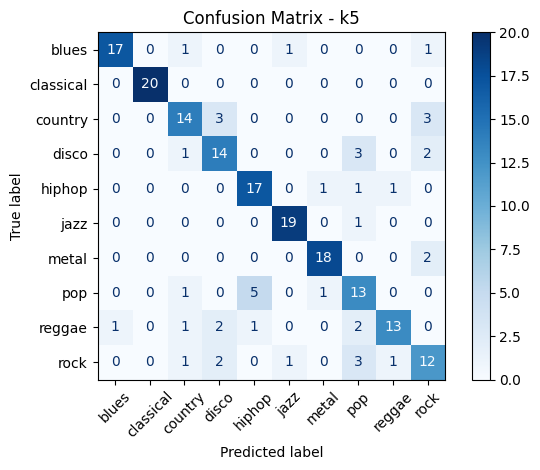

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k5")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold/confusionmatrix_genre_mel_k5.pdf')
plt.show()

In [4]:
from google.colab import runtime
runtime.unassign()

# Geração de Tabela

In [2]:
import numpy as np
import pandas as pd
import os

# Diretório base onde os arquivos estão salvos
base_path = "/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_spec_mel_kfold"

# Inicializa dicionários para os resultados
final_train_acc = {}
max_train_acc = {}
final_val_acc = {}
max_val_acc = {}

# Loop para k = 1 até 5
for k in range(1, 6):
    acc_path = os.path.join(base_path, f"acc_total_k{k}.npy")
    val_acc_path = os.path.join(base_path, f"val_acc_total_k{k}.npy")

    acc = np.load(acc_path)
    val_acc = np.load(val_acc_path)

    final_train_acc[f'k{k}'] = acc[-1]
    max_train_acc[f'k{k}'] = np.max(acc)
    final_val_acc[f'k{k}'] = val_acc[-1]
    max_val_acc[f'k{k}'] = np.max(val_acc)

# Calcula a média e desvio padrão para cada linha
def add_resultado_final_std(row):
    valores = np.array([v for v in row.values()])
    return np.mean(valores), np.std(valores)

# Construindo DataFrame
df = pd.DataFrame({
    "Acurácia Final - Treinamento": final_train_acc,
    "Valor Máximo Acurácia - Treinamento": max_train_acc,
    "Acurácia Final - Validação": final_val_acc,
    "Valor Máximo Acurácia - Validação": max_val_acc
}).T

# Adiciona colunas de média e desvio padrão
df["Resultado Final"] = df.mean(axis=1)
df["Desvio Padrão"] = df.std(axis=1)

In [3]:
df

,k1,k2,k3,k4,k5,Resultado Final,Desvio Padrão
Acurácia Final - Treinamento,0.99500,0.9975,0.995,0.99750,0.9975,0.9965,0.001225
Valor Máximo Acurácia - Treinamento,0.99875,1.0000,1.000,0.99875,1.0000,0.9995,0.000612
Acurácia Final - Validação,0.83500,0.8500,0.800,0.81500,0.7850,0.8170,0.023367
Valor Máximo Acurácia - Validação,0.86000,0.8550,0.820,0.84000,0.8000,0.8350,0.022361
